### DCGAN ###

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Set random seed for reproducibility
torch.manual_seed(42)

# Select and display device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device in use:", device.type)

Device in use: cuda


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.discriminator = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Dropout2d(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Dropout2d(0.3),
            nn.Flatten(),
            nn.Linear(7*7*128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.discriminator(x)


class Generator(nn.Module):
    def __init__(self, num_features):
        super(Generator, self).__init__()

        self.fc = nn.Linear(num_features, 7*7*128)
        self.relu = nn.ReLU()
        self.bn1d = nn.BatchNorm1d(7*7*128)

        self.conv_transpose = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.bn1d(x)
        x = x.view(x.size(0), 128, 7, 7)   # Reshape the tensor to match the expected input shape
        x = self.conv_transpose(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr =  0.001
batch_size = 8
num_features = 128
num_epochs = 20

In [ ]:
# Load Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root='.', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8365448.56it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138809.64it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2597280.18it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5265124.85it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
# Initialize the discriminator and generator
discriminator = Discriminator().to(device)
generator = Generator(num_features).to(device)

# Define the loss functions
criterion = nn.BCELoss()

# Define the optimizers for discriminator and generator
optim_discriminator = optim.RMSprop(discriminator.parameters(), lr=lr,  alpha=0.9, eps=1e-07)
optim_generator = optim.RMSprop(generator.parameters(), lr=lr, alpha=0.9, eps=1e-07)

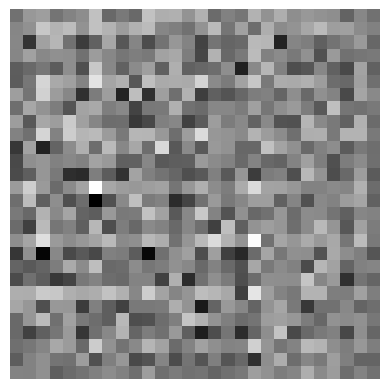

In [ ]:
# test generator output with no training
generator.eval()
noise = torch.randn(1, num_features).to(device)
with torch.no_grad():
  generated_image = generator(noise).detach().cpu().numpy()
plt.imshow(generated_image[0,0,:,:],cmap = 'gray')
plt.axis("off")
plt.show()


In [ ]:
# Generate and visualize samples from the generator
def visualize_samples(generator, num_features, device, num_samples=batch_size):
    generator.eval()  # Set the generator to evaluation mode

    # Generate random noise vector
    noise = torch.randn(num_samples, num_features).to(device)

    # Generate samples from the generator
    with torch.no_grad():
        generated_images = generator(noise).detach().cpu()

    # Rescale generated images to a range of [0, 1]
    # generated_images = (generated_images + 1) / 2

    # Create a grid of generated images
    grid = vutils.make_grid(generated_images, nrow=int(num_samples ** 0.5), normalize=True)

    # Visualize the grid of generated images
    plt.figure(figsize=(5, 5))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis("off")
    plt.show()

Epoch [0/20] Batch 0/7500 Loss D: 0.6959, Loss G: 1.4622
Epoch [0/20] Batch 200/7500 Loss D: 0.1801, Loss G: 2.3216
Epoch [0/20] Batch 400/7500 Loss D: 0.2990, Loss G: 2.6643
Epoch [0/20] Batch 600/7500 Loss D: 0.3613, Loss G: 1.2958
Epoch [0/20] Batch 800/7500 Loss D: 0.5508, Loss G: 2.2444
Epoch [0/20] Batch 1000/7500 Loss D: 0.3827, Loss G: 1.6343
Epoch [0/20] Batch 1200/7500 Loss D: 0.3543, Loss G: 1.7881
Epoch [0/20] Batch 1400/7500 Loss D: 0.6944, Loss G: 2.0659
Epoch [0/20] Batch 1600/7500 Loss D: 0.2165, Loss G: 2.0287
Epoch [0/20] Batch 1800/7500 Loss D: 0.4756, Loss G: 1.5519
Epoch [0/20] Batch 2000/7500 Loss D: 0.5924, Loss G: 1.9643
Epoch [0/20] Batch 2200/7500 Loss D: 0.4800, Loss G: 1.8422
Epoch [0/20] Batch 2400/7500 Loss D: 0.3254, Loss G: 1.8831
Epoch [0/20] Batch 2600/7500 Loss D: 0.5951, Loss G: 1.9331
Epoch [0/20] Batch 2800/7500 Loss D: 0.8127, Loss G: 1.5404
Epoch [0/20] Batch 3000/7500 Loss D: 0.7525, Loss G: 1.5093
Epoch [0/20] Batch 3200/7500 Loss D: 0.5979, Lo

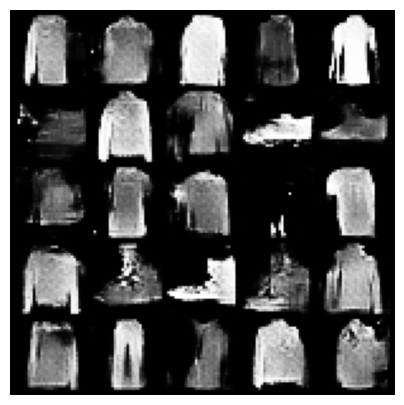

Epoch [1/20] Batch 0/7500 Loss D: 0.8362, Loss G: 0.8069
Epoch [1/20] Batch 200/7500 Loss D: 0.7435, Loss G: 0.7788
Epoch [1/20] Batch 400/7500 Loss D: 0.3935, Loss G: 2.0736
Epoch [1/20] Batch 600/7500 Loss D: 0.5663, Loss G: 0.8967
Epoch [1/20] Batch 800/7500 Loss D: 0.6228, Loss G: 1.3578
Epoch [1/20] Batch 1000/7500 Loss D: 0.7809, Loss G: 1.3517
Epoch [1/20] Batch 1200/7500 Loss D: 0.6222, Loss G: 2.0211
Epoch [1/20] Batch 1400/7500 Loss D: 0.5694, Loss G: 2.2245
Epoch [1/20] Batch 1600/7500 Loss D: 0.8310, Loss G: 1.5905
Epoch [1/20] Batch 1800/7500 Loss D: 0.4874, Loss G: 1.1548
Epoch [1/20] Batch 2000/7500 Loss D: 0.6908, Loss G: 1.6035
Epoch [1/20] Batch 2200/7500 Loss D: 0.4936, Loss G: 1.9862
Epoch [1/20] Batch 2400/7500 Loss D: 0.7322, Loss G: 1.2917
Epoch [1/20] Batch 2600/7500 Loss D: 0.4282, Loss G: 1.7781
Epoch [1/20] Batch 2800/7500 Loss D: 0.3526, Loss G: 1.5181
Epoch [1/20] Batch 3000/7500 Loss D: 0.6208, Loss G: 1.4804
Epoch [1/20] Batch 3200/7500 Loss D: 0.6430, Lo

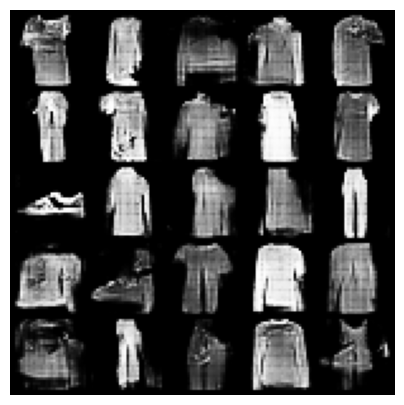

Epoch [6/20] Batch 0/7500 Loss D: 0.6733, Loss G: 1.5329
Epoch [6/20] Batch 200/7500 Loss D: 0.8000, Loss G: 0.7820
Epoch [6/20] Batch 400/7500 Loss D: 0.9517, Loss G: 0.9444
Epoch [6/20] Batch 600/7500 Loss D: 0.7921, Loss G: 1.6242
Epoch [6/20] Batch 800/7500 Loss D: 0.5265, Loss G: 1.5306
Epoch [6/20] Batch 1000/7500 Loss D: 0.5086, Loss G: 1.5380
Epoch [6/20] Batch 1200/7500 Loss D: 0.4719, Loss G: 0.9383
Epoch [6/20] Batch 1400/7500 Loss D: 0.6355, Loss G: 1.7799
Epoch [6/20] Batch 1600/7500 Loss D: 0.7962, Loss G: 1.4822
Epoch [6/20] Batch 1800/7500 Loss D: 0.5717, Loss G: 1.7604
Epoch [6/20] Batch 2000/7500 Loss D: 0.5918, Loss G: 1.4138
Epoch [6/20] Batch 2200/7500 Loss D: 0.5061, Loss G: 2.4406
Epoch [6/20] Batch 2400/7500 Loss D: 0.3328, Loss G: 1.6882
Epoch [6/20] Batch 2600/7500 Loss D: 0.6773, Loss G: 1.2153
Epoch [6/20] Batch 2800/7500 Loss D: 0.7383, Loss G: 1.2602
Epoch [6/20] Batch 3000/7500 Loss D: 0.7131, Loss G: 1.8586
Epoch [6/20] Batch 3200/7500 Loss D: 0.6295, Lo

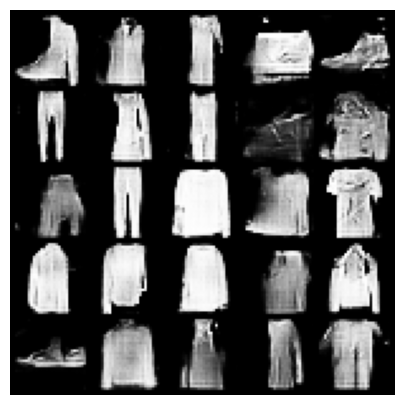

Epoch [11/20] Batch 0/7500 Loss D: 0.5996, Loss G: 0.8527
Epoch [11/20] Batch 200/7500 Loss D: 0.6725, Loss G: 1.1112
Epoch [11/20] Batch 400/7500 Loss D: 0.5969, Loss G: 1.3804
Epoch [11/20] Batch 600/7500 Loss D: 0.5134, Loss G: 1.9302
Epoch [11/20] Batch 800/7500 Loss D: 0.7075, Loss G: 1.0380
Epoch [11/20] Batch 1000/7500 Loss D: 0.5368, Loss G: 1.3453
Epoch [11/20] Batch 1200/7500 Loss D: 0.9029, Loss G: 0.9463
Epoch [11/20] Batch 1400/7500 Loss D: 0.6678, Loss G: 1.3755
Epoch [11/20] Batch 1600/7500 Loss D: 0.8751, Loss G: 1.2623
Epoch [11/20] Batch 1800/7500 Loss D: 0.9500, Loss G: 1.4701
Epoch [11/20] Batch 2000/7500 Loss D: 0.7343, Loss G: 0.6816
Epoch [11/20] Batch 2200/7500 Loss D: 0.5477, Loss G: 1.6128
Epoch [11/20] Batch 2400/7500 Loss D: 0.9528, Loss G: 1.3698
Epoch [11/20] Batch 2600/7500 Loss D: 0.6239, Loss G: 1.5515
Epoch [11/20] Batch 2800/7500 Loss D: 0.4283, Loss G: 0.9788
Epoch [11/20] Batch 3000/7500 Loss D: 0.7243, Loss G: 1.2079
Epoch [11/20] Batch 3200/7500 L

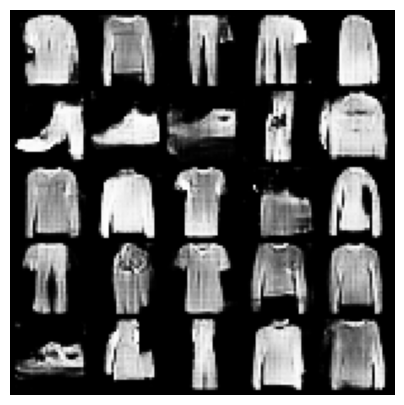

Epoch [16/20] Batch 0/7500 Loss D: 0.6287, Loss G: 0.8985
Epoch [16/20] Batch 200/7500 Loss D: 0.4984, Loss G: 1.2833
Epoch [16/20] Batch 400/7500 Loss D: 0.5950, Loss G: 1.2950
Epoch [16/20] Batch 600/7500 Loss D: 0.3642, Loss G: 1.5113
Epoch [16/20] Batch 800/7500 Loss D: 0.7029, Loss G: 1.0615
Epoch [16/20] Batch 1000/7500 Loss D: 0.5456, Loss G: 1.3583
Epoch [16/20] Batch 1200/7500 Loss D: 0.6870, Loss G: 0.8386
Epoch [16/20] Batch 1400/7500 Loss D: 0.5720, Loss G: 0.8823
Epoch [16/20] Batch 1600/7500 Loss D: 0.5269, Loss G: 1.5549
Epoch [16/20] Batch 1800/7500 Loss D: 0.8134, Loss G: 1.9886
Epoch [16/20] Batch 2000/7500 Loss D: 0.6346, Loss G: 0.8758
Epoch [16/20] Batch 2200/7500 Loss D: 0.7609, Loss G: 1.2562
Epoch [16/20] Batch 2400/7500 Loss D: 0.7610, Loss G: 1.5627
Epoch [16/20] Batch 2600/7500 Loss D: 0.6076, Loss G: 1.3377
Epoch [16/20] Batch 2800/7500 Loss D: 0.9049, Loss G: 1.1446
Epoch [16/20] Batch 3000/7500 Loss D: 0.7420, Loss G: 1.3139
Epoch [16/20] Batch 3200/7500 L

In [ ]:
# Training loop
losses_d = []
losses_g = []

generator.train()
discriminator.train()
for epoch in range(num_epochs):
    epochLossG = 0
    epochLossD = 0
    for batch_idx, (real, _) in enumerate(train_loader):

        real = real.to(device)
        batch_size = real.shape[0]

        # Train Discriminator: maximize log(D(x)) + log(1 - D(G(z)))
        noise = torch.randn(batch_size, num_features).to(device)
        fake = generator(noise)
        disc_real = discriminator(real).reshape(-1)
        loss_d_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = discriminator(fake.detach()).reshape(-1)
        loss_d_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_d = (loss_d_real + loss_d_fake) / 2

        discriminator.zero_grad()
        loss_d.backward()
        optim_discriminator.step()

        # Train Generator: maximize log(D(G(z)))
        output = discriminator(fake).reshape(-1)
        loss_g = criterion(output, torch.ones_like(output))

        generator.zero_grad()
        loss_g.backward()
        optim_generator.step()

        # Save losses
        losses_d.append(loss_d.item())
        losses_g.append(loss_g.item())

        epochLossD += loss_d
        epochLossG += loss_g

        if batch_idx % 200 == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(train_loader)} "
                f"Loss D: {loss_d:.4f}, Loss G: {loss_g:.4f}"
            )

    if epoch % 5 == 0:
      visualize_samples(generator, num_features, device, num_samples=25)


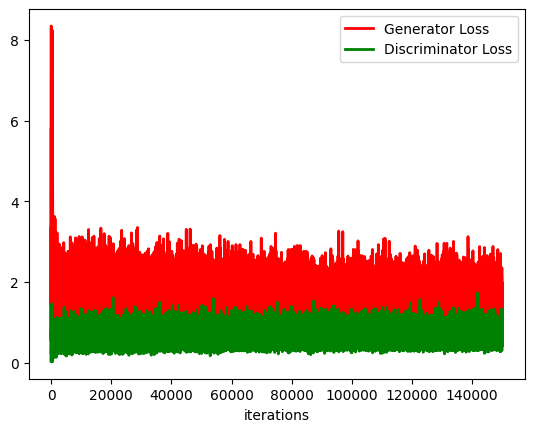

In [ ]:
iterations = range(len(losses_g))
plt.figure()
plt.plot(iterations, losses_g,color='r',linewidth=2,label='Generator Loss')
plt.plot(iterations, losses_d,color='g',linewidth=2,label='Discriminator Loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

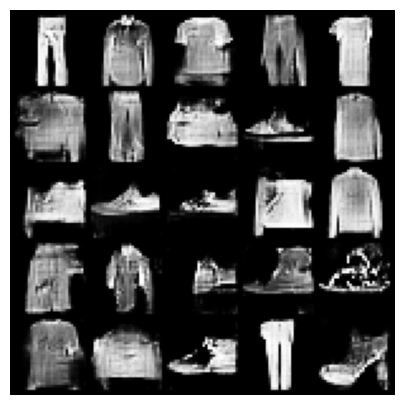

In [ ]:
# Call the visualize_samples function at desired intervals during training
# to visualize the progression of generated samples

# Example usage:
visualize_samples(generator, num_features, device, num_samples=25)

### WGAN ###

In [ ]:
import torch
import torchvision.datasets
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import autograd
from google.colab import drive
import torch.optim as optim
import pdb

In [ ]:
print ('Available GPU devices ', torch.cuda.device_count())

is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is set")
else:
    device = torch.device("cpu")

In [ ]:
# Downloading data
trainset = torchvision.datasets.FashionMNIST(root = "./data/FashionMnist", train = True,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)

In [ ]:
from google.colab import drive
drive.mount('Google_drive')

%ls Google_drive/MyDrive/'Deep Learning'/Hw/ex3_303142897_206295917/Q4_WGAN/
!realpath Google_drive/MyDrive/'Deep Learning'/Hw/ex2_303142897_206295917/PTB/train/ptb.train.txt

In [ ]:
IMAGE_SIZE = 28
OUTPUT_DIM = (IMAGE_SIZE)**2
IMAGE_CHANNEL_SIZE = 1
# Save path
SAVE_PATH = "Google_drive/MyDrive/'Deep Learning'/Hw/ex3_303142897_206295917/Q4_WGAN/"
SAVE_FLAG = True

In [ ]:
# Summarize loaded dataset:
print('Train: %u' % (len(trainset)))

# Plot first few images:
class_names = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
plt.figure(figsize=(10,10))
n_samples = 25

for i in range(n_samples):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    trainset_img = trainset[i][0]
    plt.imshow(trainset_img.squeeze(), cmap='gray')
    plt.xlabel(class_names[trainset[i][1]])
plt.show()

In [ ]:
class Generator(nn.Module):
    def __init__(self, channel_dim, noise_dim):
        # configurations
        super().__init__()
        # channel_dim is the feature dimension not IMAGE_CHANNEL_SIZE which is 1.
        # the name channel is confusing!
        self.channel_dim = channel_dim
        self.noise_dim = noise_dim

        # layers:

        # input: (n_sample, noise_dim)
        # n_sample is batch_size.
        # output of linear dimension will be reshaped into:
        # (n_samples, num_features, height, width) =
        # (?, channel_dim * 4, IMAGE_SIZE // 4 = 7, IMAGE_SIZE // 4)
        # which will then be passed to BN and Deconv layers.
        self.fc = nn.Linear(noise_dim, (channel_dim * 4) * (IMAGE_SIZE // 4) ** 2)
        self.bn0 = nn.BatchNorm2d(channel_dim * 4)

        # channel_dim * 4 = input channel size.
        # channel_dim * 2 = output channel size.
        # width/height output = 2 * H_in = (H_in - 1) * stride
        # - 2 * padding + (filter_size - 1) + output_padding + 1
        # we get: (n_samples, channel_dim * 2, IMAGE_SIZE // 2 = 14, IMAGE_SIZE // 2)
        self.deconv1 = nn.ConvTranspose2d(
            channel_dim * 4, channel_dim * 2,
            kernel_size = 5, stride = 2, padding = 2,
             output_padding = 1)
        self.bn1 = nn.BatchNorm2d(channel_dim * 2)

        # output: (n_samples, channel_dim, IMAGE_SIZE = 28, IMAGE_SIZE)
        self.deconv2 = nn.ConvTranspose2d(
            channel_dim * 2, channel_dim,
            kernel_size = 5, stride = 2, padding = 2,
            output_padding = 1)
        self.bn2 = nn.BatchNorm2d(channel_dim)

        # output: (n_samples, IMAGE_CHANNEL_SIZE, IMAGE_SIZE, IMAGE_SIZE)
        self.deconv3 = nn.ConvTranspose2d(
            channel_dim, IMAGE_CHANNEL_SIZE,
            kernel_size = 5, stride = 1, padding = 2)

    def forward(self, z):
        g = F.relu(self.bn0(self.fc(z).view(
            z.size(0),
            self.channel_dim * 4,
            IMAGE_SIZE // 4,
            IMAGE_SIZE // 4,
        )))
        g = F.relu(self.bn1(self.deconv1(g)))
        g = F.relu(self.bn2(self.deconv2(g)))
        g = torch.tanh((self.deconv3(g)))
        return g

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, channel_dim):
        # configurations
        super().__init__()
        self.channel_dim = channel_dim

        # layers

        # input channel dimension = IMAGE_CHANNEL_SIZE
        # output channel dimension = d_dim * conv1_dim
        # H_out = H_in / 2 = floor((H_in + 2*P - F)/S + 1)
        # If stride or filter_size change, so padding should as well.
        # output = (n_samples, channel_dim, H_in/2 = 14, W_in/2)
        self.conv1 = nn.Conv2d(
            IMAGE_CHANNEL_SIZE, channel_dim,
            kernel_size = 4, stride = 2, padding = 1)

        # output: (n_samples, channel_dim * 2, H_in/2 = 7, W_in/2)
        self.conv2 = nn.Conv2d(
            channel_dim, channel_dim * 2,
            kernel_size = 4, stride = 2, padding = 1)

        # output: (n_samples, channel_dim * 4, H_in = 7, W_in)
        self.conv3 = nn.Conv2d(
            channel_dim * 2, channel_dim * 4,
            kernel_size = 5, stride = 1, padding = 2)

        # output: (n_samples, 1)
        self.fc = nn.Linear((channel_dim * 4) * (IMAGE_SIZE // 4) ** 2, 1)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = x.view(-1, (self.channel_dim * 4) * (IMAGE_SIZE // 4) ** 2)
        return self.fc(x)

In [ ]:
class WGAN(nn.Module):
    def __init__(self, g_channel_dim, d_channel_dim, noise_dim):
        # configurations
        super().__init__()
        self.g_channel_dim = g_channel_dim
        self.d_channel_dim = d_channel_dim
        self.noise_dim = noise_dim

        # components
        self.generator = Generator(channel_dim = self.g_channel_dim,
                                           noise_dim = self.noise_dim)
        self.discriminator = Discriminator(channel_dim = self.d_channel_dim)

    # get dicriminator loss:
    # z = noise, x = input
    def disc_loss(self, x, z, return_g = False):
        g = self.generator(z)
        d_real = self.discriminator(x).mean()
        d_fake = self.discriminator(g).mean()
        l = d_fake - d_real
        return (l, g) if return_g else l

    # get generetor loss:
    def gen_loss(self, z, return_g = False):
        g = self.generator(z)
        l = -self.discriminator(g).mean()
        return (l, g) if return_g else l

    def sample_image(self, n_samples):
        return self.generator(self.sample_noise(n_samples))

    def sample_noise(self, n_samples):
      # random variables from normal distribution N(0,1) multiplied by 0.1
        noise = torch.normal(mean = 0.0, std = 1.0, size = (n_samples, self.noise_dim)) * .1
        return noise.cuda() if is_cuda else noise

    def gradient_penalty(self, d_real, d_fake, lamda):
        assert d_real.size() == d_fake.size()
        a = torch.rand(d_real.size(0), 1)
        a = a.cuda() if is_cuda else a
        # expands a into (n_samples, 1, 28, 28)
        a = a\
            .expand(d_real.size(0), d_real.nelement()//d_real.size(0))\
            .contiguous()\
            .view(d_real.size(0), IMAGE_CHANNEL_SIZE, IMAGE_SIZE, IMAGE_SIZE)
        interpolated = Variable(a*d_fake.data + (1-a)*d_real.data, requires_grad=True)
        d = self.discriminator(interpolated)
        gradients = autograd.grad(
            d, interpolated,
            grad_outputs=(torch.ones(d.size())).cuda() if is_cuda else \
            (torch.ones(d.size())).cuda(),
            create_graph=True,
            retain_graph=True,
        )[0]
        # norm is basically sqrt
        return lamda * ((1-(gradients+(1e-16)).norm(2, dim=1))**2).mean()

In [ ]:
class ModelParams():
  def __init__(self, n_epochs, batch_size, n_disc_steps, g_channel_dim,
               d_channel_dim, noise_dim, lr_g, lr_d, betas_g,
               betas_d, weight_decay_g, weight_decay_d, lamda):
    self.n_epochs = n_epochs
    self.batch_size = batch_size
    self.n_disc_steps = n_disc_steps # number of steps to train discriminator before generator
    self.g_channel_dim = g_channel_dim
    self.d_channel_dim = d_channel_dim
    self.noise_dim = noise_dim
    self.lr_g = lr_g
    self.lr_d = lr_d
    self.betas_g = betas_g # tuple of 2 elements
    self.betas_d = betas_d # tuple of 2 elements
    self.weight_decay_g = weight_decay_g
    self.weight_decay_d = weight_decay_d
    self.lamda = lamda

In [ ]:
def trainModel(model, model_params, data_loader):
  n_epochs = model_params.n_epochs
  n_disc_steps = model_params.n_disc_steps

  # Optimizers
  generator_optimizer = optim.Adam(
      model.generator.parameters(), lr = model_params.lr_g,
      betas = model_params.betas_g,
      weight_decay = model_params.weight_decay_g)

  disc_optimizer = optim.Adam(
      model.discriminator.parameters(), lr = model_params.lr_d,
      betas = model_params.betas_d,
      weight_decay = model_params.weight_decay_g)



  model.train()


  # Allow for manual keyboard interrupt
  gen_loss_list = []
  disc_loss_list = []
  for epoch in range(n_epochs):

    disc_steps = 0

    # batches loop
    for batch_number, (images, _) in enumerate(data_loader):
      # torch.FloatTensor to torch.cuda.FloatTensor
      images = Variable(images).cuda() if is_cuda else images
      # this specific batch size (last one may not be equal
      # to model_params.batch_size
      batch_size = images.shape[0]

      # 1) TRAIN CRITIC
      # If we haven't done enough steps, let's train the critic
      if disc_steps < n_disc_steps:
        model.discriminator.zero_grad()
        model.generator.zero_grad()

        z = model.sample_noise(batch_size)
        disc_loss, fake_images = model.disc_loss(images, z, return_g=True)
        grad_penalty =  model.gradient_penalty(images, fake_images,
                                               lamda=model_params.lamda)
        d_loss_gp = disc_loss + grad_penalty
        d_loss_gp.backward()
        disc_optimizer.step()

        disc_steps += 1


      # 2) TRAIN GENERATOR
      # Here we have done n_disc_steps discriminator updates,
      # so we do the generator now
      else:
        model.discriminator.zero_grad()
        model.generator.zero_grad()

        z = model.sample_noise(batch_size)
        gen_loss = model.gen_loss(z)
        gen_loss.backward()
        generator_optimizer.step()

        if disc_steps == n_disc_steps:
          gen_loss_list.append(float(gen_loss))
          disc_loss_list.append(float(disc_loss))
        disc_steps = 0

        if (batch_number + 1) % 300 == 0:
          print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f'
                %(epoch + 1, n_epochs, batch_number + 1,
                  len(data_loader), disc_loss.item(),
                  gen_loss.item()))

    # show sampled fake images after each epoch
    plt.figure(figsize=(10,10))
    for i in range(24):
      plt.subplot(4,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(fake_images[i].cpu().squeeze().detach().numpy(),
                 cmap='gray')
    plt.show()

  return gen_loss_list, disc_loss_list, \
  model.generator, model.discriminator, model

In [ ]:
model_params = ModelParams(n_epochs = 15,
                           batch_size = 56,
                           n_disc_steps = 5,
                           g_channel_dim = 112,
                           d_channel_dim = 112,
                           noise_dim = 112,
                           lr_g = 2.5e-03,
                           lr_d = 2.5e-03,
                           betas_g = (0.5, 0.9),
                           betas_d = (0.5, 0.9),
                           weight_decay_g = 11e-04,
                           weight_decay_d = 11e-04,
                           lamda = 10)

# Loading data
trainloader = torch.utils.data.DataLoader(trainset, batch_size = model_params.batch_size, shuffle = True)

# Initializing WGAN model
wgan = WGAN(g_channel_dim = model_params.g_channel_dim,
            d_channel_dim = model_params.d_channel_dim,
            noise_dim = model_params.noise_dim)
if is_cuda:
  wgan.cuda()
try:
  gen_loss_list, disc_loss_list, generator, \
  discriminator, wgan = trainModel(wgan, model_params, trainloader)
except KeyboardInterrupt:
  print("Training ended early")

In [ ]:
iterations = range(len(gen_loss_list))
plt.figure()
plt.plot(iterations, gen_loss_list,color='r',linewidth=2,label='Generator Loss')
plt.plot(iterations, disc_loss_list,color='g',linewidth=2,label='Discriminator Loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [ ]:
SAVE_PATH = 'Google_drive/MyDrive/Deep Learning/Hw/ex3_303142897_206295917/Q4_WGAN/'
print(SAVE_PATH)
if SAVE_FLAG is True:
  savepath = SAVE_PATH +"/WGAN_Generator.pt"
  print ('saving model in '+ savepath)
  torch.save(generator.state_dict(), savepath)
  savepath = SAVE_PATH +"/WGAN_Discriminator.pt"
  print ('saving model in '+ savepath)
  torch.save(discriminator.state_dict(), savepath)
  savepath = SAVE_PATH +"/WGAN_Model.pt"
  print ('saving model in '+ savepath)
  torch.save(wgan.state_dict(), savepath)

In [ ]:
savepath = SAVE_PATH +"/WGAN_Model.pt"
wgan.load_state_dict(torch.load(savepath,map_location='cpu'))

n_samples = 25
fake_images = wgan.sample_image(n_samples)
plt.figure(figsize=(10,10))
for i in range(n_samples):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(fake_images[i].cpu().squeeze().detach().numpy(),
             cmap='gray')
  plt.show()